# KNN aplicado ao reconhecimento de dígitos (MNIST) 

In [ ]:
import torch
print(torch.__version__)
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F

1.2.0


### Loading the dataset (MNIST)

In [2]:
train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())


Separando algumas amostras para treino e outras para teste

In [3]:
n_training_samples = 10000
train_data = train_dataset.data[:n_training_samples].view(n_training_samples, -1)
train_targets = train_dataset.targets[:n_training_samples].view(n_training_samples, -1)

test_data = test_dataset.data[:500].view(500, -1)
test_targets = test_dataset.targets[:500].view(500, -1)

# transformando os valores de pixel (int) para double 
train_data = train_data.float()
test_data = test_data.float()

Vamos verificar um exemplo:

Forma dos dados de teste: torch.Size([500, 784])
Classe da imagem: 7


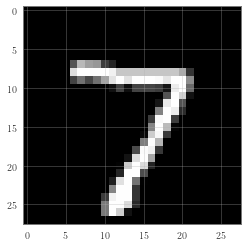

In [25]:
import matplotlib.pyplot as plt

print('Forma dos dados de teste:', test_data.shape)
print('Classe da imagem:', test_targets[0].item())
img = test_data[0].view(28, 28)
plt.imshow(img, cmap='gray')
plt.show()

### Definindo o modelo e realizando predições

In [21]:
class KNN():
    def __init__(self, K, train_data, train_targets):
        super(KNN, self).__init__()
        self.data = train_data
        self.K = K
        self.targets = train_targets

    def predict(self, x):
        dists = torch.cdist(x, self.data) # computa dist. ponto a ponto
        idxs = dists.argsort()[:, :self.K] # orderna e separa os indices dos k mais proximos
        knns = self.targets[idxs]  # seleciona os rotulos dos vizinhos
        return knns.mode(dim=1).values  # retorna os valores da moda nos K vizinhos
    
model = KNN(5, train_data, train_targets) # usando K=5

In [22]:
predictions = model.predict(test_data) # Predições

# Computando a taxa de acerto (conjunto de teste)
acc = torch.mean((predictions-test_targets == 0).float())
print(acc)

tensor(0.9180)


In [23]:
pred_train = model.predict(train_data) # Predições (treino)

# Computando a taxa de acerto (conjunto de treino)
acc = torch.mean((pred_train-train_targets == 0).float())
print(acc)

tensor(0.9669)


### Outra forma de calcular distâncias ponto-a-ponto

In [24]:
def pdist2(x, y):
    n = x.size(0)
    m = y.size(0)
    d = x.size(1)
    x = x.unsqueeze(1).expand(n, m, d)
    y = y.unsqueeze(0).expand(n, m, d)
    return torch.pow(x - y, 2).sum(2)     
